In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

In [4]:
def loadData(data):
    df = pd.read_csv(data)

    # print(df.shape[1])

    x = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    return x,y

In [5]:
def cat2num(y):
    for i in range(len(y)):
        if y[i] == 'dos':
            y[i] = 0
        elif y[i] == 'normal':
            y[i] = 1
        elif y[i] == 'probe':
            y[i] = 2
        elif y[i] == 'r2l':
            y[i] = 3
        else:
            y[i] = 4
    return y

In [6]:
def PCA(x):
    
    print('PCA Started !')
    print('')
    
    mu = np.mean(x, axis=0)
    cov = ( ((x - mu).T).dot(x - mu) ) / (x.shape[0]-1)
#     print('Covariance matrix \n%s' %cov)

    eigenVal, eigenVec = np.linalg.eig(cov)
#     print('Eigenvectors \n%s' %eigenVec)
#     print('\nEigenvalues \n%s' %eigenVal)
    
    eList = []
    for i in range(len(eigenVal)):
        eList.append((np.abs(eigenVal[i]), eigenVec[:,i]))
#     print(eList)

    eList.sort(key=lambda x:x[0])
    eList.reverse()

#     print('Eigenvalues in descending order:')
#     for i in eList:
#         print(i[0])
    
    eSum = sum(eigenVal)
    eVar = []
    for i in sorted(eigenVal, reverse=True):
        eVar.append((i / eSum)*100)
    
    eVar = np.abs(np.cumsum(eVar))
#     print(eVar)

    # Calculating the index of first eigen value, upto which error is <10%
    index = next(x[0] for x in enumerate(eVar) if x[1] > 90)
    print('Number of eigen values selected to maintain threshold at 10% is:',index+1)
    print('')
    
    w = eList[0][1].reshape(len(eigenVec),1)
    for i in range(1,index+1):
        w = np.hstack((w, eList[i][1].reshape(len(eigenVec),1))) #Concatinating Eigen Vectors column wise to form W matrix
#     print('Matrix W:\n', w)
#     print(w.shape)

    x_reduced = x.dot(w)
    print('PCA Reduced Data')
    print('')
    print(x_reduced)
    print('')
    print('PCA Completed !')
    
    return x_reduced
    

In [9]:
def cal_purity(labels,y):
    cnf_matrix = np.zeros((5,5))
    for i in range(len(y)):
                cnf_matrix[int(labels[i]),y[i]] +=1 
    num = 0
    for i in range(5):
        num += np.max(cnf_matrix[i]) 
    return (num/len(y))

PCA Started !

Number of eigen values selected to maintain threshold at 10% is: 14

PCA Reduced Data

[[-2.50946520e+00  9.52118043e-01  8.05755168e-02 ...  8.50312294e-02
  -4.78761528e-01  3.80057517e-01]
 [ 1.19325993e+00 -5.59820431e+00  2.70795585e-01 ...  6.43676015e-02
   4.30117879e-01  2.64015116e-01]
 [-2.44710014e+00  9.08939709e-01  6.03192180e-02 ...  5.04823140e-02
  -7.54360905e-01  4.29615250e-01]
 ...
 [-2.14676535e-01 -3.09877590e-01 -1.37272986e+01 ...  1.72825356e+01
  -1.61696242e+00  1.79863104e+00]
 [-3.46663135e+00  5.46446031e-01 -7.44319096e-02 ...  3.55261207e-01
   4.57109427e-01 -7.13572892e-01]
 [ 4.01832089e+00  1.12480793e+00 -6.01524597e-02 ... -3.89962407e-03
   2.80523132e-01  2.18831703e-01]]

PCA Completed !
GMM Started !!!

GMM Completed !!!


Purity while reducing data as per threshold:  0.7853828306264501


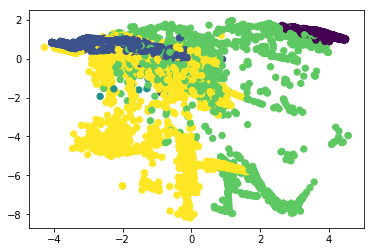

In [10]:
if __name__ == '__main__':
    
    data = '../Dataset/intrusion_detection/data.csv'
    x,y = loadData(data)
    y = cat2num(y)

    x = StandardScaler().fit_transform(x)
    x_reduced = PCA(x)
    
    #GMM
    print('GMM Started !!!')
    print('')
    gmm = GaussianMixture(n_components=5).fit(x_reduced)
    labels = gmm.predict(x_reduced)
    plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=labels, s=40, cmap='viridis');
    print('GMM Completed !!!')
    print('')
    
    purity_gmm = cal_purity(labels,y)
    print('')
    print('Purity while reducing data as per threshold: ', purity_gmm)

    

In [ ]:
#     Hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
clustering.fit_predict(x_reduced)
labels = clustering.labels_
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=labels, s=40, cmap='viridis');
print('Hierarchical clustering Completed !!!')
print('')

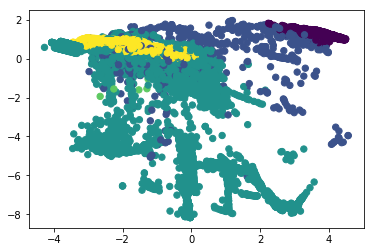
